In [89]:
import pandas as pd
import numpy as np

# 그래프
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 표준화
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split

# 분류 NN(MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
#글씨체 설정

matplotlib.rc('font', family="Malgun Gothic")
plt.rc('font', family = 'Malgun Gothic')

In [4]:
# data 불러오기
data = pd.read_csv("유방암.csv", engine = 'python', encoding='cp949')
data.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


## 데이터 구성하기

In [6]:
# 결측치 확인, 결측치 없음 > 결측치 처리X

data.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [8]:
# x와 y 목표변수 기준으로 분리
data_y = data[['diagnosis']]
data_x = data.drop('diagnosis', axis=1)

# 더미변수 생성
data_x = pd.get_dummies(data_x)
data_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [33]:
# 데이터 분할 후 train, test 데이터로 저장

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.4, random_state = 1234)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(192, 30)
(128, 30)
(192, 1)
(128, 1)


## MLPClassifier  모델 생성

In [34]:
#scale 변환하지 않고 일단 기본 옵션으로 모델 생성
nn_uncustomized = MLPClassifier(random_state=1234)
# hidden_layer_sizes=(100, 100) 변경 - 은닉층 2개, 각 은닉층 노드 100개
nn_uncustomized.fit(train_x, train_y)

#train 데이터 셋 정확도
print("Accuracy on training ser: {:.3f}".format(nn_uncustomized.score(train_x, train_y)))
#test 데이터 셋 정확도
print("Accuracy on test ser: {:.3f}".format(nn_uncustomized.score(test_x, test_y)))

C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training ser: 0.901
Accuracy on test ser: 0.930


C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 인공신경망 기본 옵션 모델의 정확도는 train 90.1%, test 93.0%로 
## 부분적으로 test 데이터에 대해 과대적합이나, 둘의 차이가 크지 않아,
## 일반화는 잘된 모델임을 알 수 있다.

In [35]:
#현재 생성된 SVC 모델의 옵션 확인

nn_uncustomized

MLPClassifier(random_state=1234)

## MLPClassifier 모델 Param. 변경

In [36]:
#Hidden layer : 은닉층
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# hidden_layer_sizes: 은닉층 변경 (20, 40, ..., 160)
para_hidden = [20*hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) 
    #1차원에 대한 식, 2차원을 하려면 hidden_layer_sizes = (v_hidden, v_hidden) 으로, (20,20),(40,40)... 이런 식으로 범위 변경
    nn.fit(train_x, train_y)
    train_accuracy.append(nn.score(train_x, train_y))
    test_accuracy.append(nn.score(test_x, test_y))

#데이터 테이블로 저장
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

# 은닉층 별 정확도 테이블
df_accuracy_hidden.round(3)

C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ymh

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.401,0.242
1,40,0.594,0.758
2,60,0.917,0.930
3,80,0.932,0.898
4,100,0.901,0.930
5,120,0.599,0.758
6,140,0.599,0.758
7,160,0.599,0.758


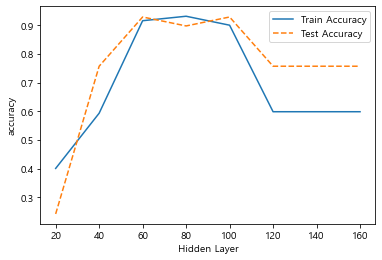

In [37]:
#모델의 정확도를 그래프로 확인
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Hidden Layer')
plt.legend()

#은닉층의 구조가 복잡할 수록 모델의 정확도는 향상되며, 과대적합의 확률이 높아진다.
#hidden_layer_sizes = (a,b,c,...) 이런 식으로 설정하면, 1층에 a개만큼, 2층에 b개만큼.. 이런 식으로 생성한다.

In [38]:
#activation 활성화 함수 변경
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# activation 변경
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(train_x, train_y)
    train_accuracy.append(nn.score(train_x, train_y))
    test_accuracy.append(nn.score(test_x, test_y))

    
#데이터 테이블로 저장
df_accuracy_function= pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

# Activation Function 별 정확도 테이블
df_accuracy_function.round(3)

C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ymh20\anaconda3\lib\sit

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.948,0.898
1,tanh,0.958,0.891
2,relu,0.901,0.930


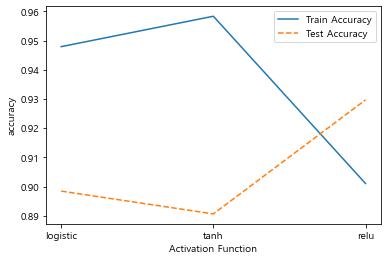

In [39]:
#모델의 정확도를 그래프로 확인

plt.plot(para_function, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Activation Function')
plt.legend()

## 'relu' 함수 적용 시, 제일 일반화가 잘되어 있다고 할 수 있으나, test에 과대적합 되어 있고,
## 'logistic' 함수 적용 시, train 데이터로 과대적합 되어 있다고 할 수 있으며,
## 'tanh' 함수 적용 시,  trian 데이터의 정확도는 가장 높으나, test 에 비해 제일 과대적합이고,
## 'logistic' 과 'tanh' 함수 모두 일반화가 좋은 모델이 아니다.
## Scale 변환 후 다시 모델을 적용해보려 한다.

In [40]:
#Scale 변환
#standardscaler : 설명변수 scale 변경
# 변수명 저장
v_feature_name = train_x.columns

# StandaerScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [41]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state=1234)

print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size: (192, 30)
test data X size: (128, 30)


In [42]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, train_y)

# train 데이터 셋 정확도 확인
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, train_y)))
#test 데이터 셋 정확도 확인
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, test_y)))

C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.995
Accuracy on test set: 0.953


C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## scaled된 인공신경망 기본 옵션 모델의 정확도는 train 99.5%, test 95.3%로 
## 높은 정확도를 보이면서, 부분적으로 train 데이터에 대해 과대적합이나, 그 차이가 크지 않아,
## 일반화또한 어느정도 좋은, 잘된 모델임을 알 수 있다

In [47]:
# scaled 된 모델의 Hidden layer(은닉층) 변경 (1D 확인)
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# hidden_layer_sizes: 은닉층 변경 (20, 40, ..., 160)
para_hidden = [20 * hidden for hidden in range(1, 11)]

#1차원에 대한 식, 2차원을 하C려면 hidden_layer_sizes = (v_hidden, v_hidden) 으로, (20,20),(40,40)... 이런 식으로 범위 변경
for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) #1D
    #nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) #2D
    nn.fit(df_scaled_train_x, train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, test_y))

#데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

# 은닉층 별 정확도 테이블
df_accuracy_hidden.round(3)

C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ymh20\anaconda3\lib\sit

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.958,0.883
1,40,0.990,0.945
2,60,0.995,0.945
3,80,0.995,0.953
4,100,0.995,0.953
5,120,0.995,0.945
6,140,0.995,0.945
7,160,0.995,0.953
8,180,0.995,0.953
9,200,0.995,0.945


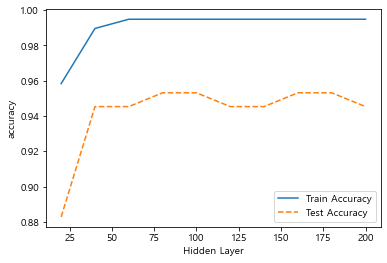

In [48]:
#모델의 정확도를 그래프로 확인
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Hidden Layer')
plt.legend()

In [49]:
# scaled 된 모델의 Hidden layer(은닉층) 변경 (2D 확인)
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# hidden_layer_sizes: 은닉층 변경 (20, 40, ..., 160)
para_hidden = [20 * hidden for hidden in range(1, 11)]

#1차원에 대한 식, 2차원을 하C려면 hidden_layer_sizes = (v_hidden, v_hidden) 으로, (20,20),(40,40)... 이런 식으로 범위 변경
for v_hidden in para_hidden:
    #nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) #1D
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) #2D
    nn.fit(df_scaled_train_x, train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, test_y))

#데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

# 은닉층 별 정확도 테이블
df_accuracy_hidden.round(3)

C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ymh20\anaconda3\lib\sit

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.995,0.953
1,40,0.995,0.953
2,60,0.995,0.953
3,80,1.000,0.938
4,100,1.000,0.945
5,120,1.000,0.953
6,140,1.000,0.945
7,160,1.000,0.953
8,180,1.000,0.953
9,200,1.000,0.945


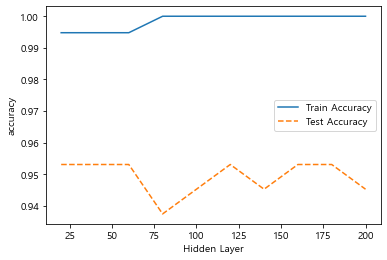

In [50]:
#모델의 정확도를 그래프로 확인
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Hidden Layer')
plt.legend()

## 은닉층의 구조가 복잡할수록 모델의 정확도는 향상되고 과대적합 되므로,
## 2D까지만 확인해보고, Scaled 된 2D 모델의 정확도 그래프를 통해
## hidden_layer_sizes = (60, 60)으로 지정한다. (왜냐하면, 2D이므로)

In [51]:
#activation 활성화 함수 변경
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# activation 변경
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (60, 60), random_state = 1234)
    nn.fit(df_scaled_train_x, train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, test_y))

#데이터 테이블로 저장 및 확인
df_accuracy_function= pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy
df_accuracy_function.round(3)

C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ymh20\anaconda3\lib\sit

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.995,0.945
1,tanh,0.995,0.938
2,relu,0.995,0.953


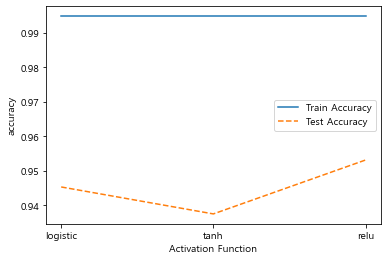

In [52]:
#Activation function별 정확도 그래프로 확인

plt.plot(para_function, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Activation Function')
plt.legend()

## 위 그래프를 통해, train 데이터의 정확도는 activation function에 관계없이 같으므로,
## 'relu' 함수를 선택하여, train 데이터와 test데이터의 차이를 좁혀, 한 쪽으로의 과대적합과
## 일반화가 되지 못하는 것을 최대한 방지한다.
## activation = 'relu'

In [53]:
# solver : 가중치 최적화 변경
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# solver 변경
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = 'relu', hidden_layer_sizes = (60, 60), random_state = 1234)
    nn.fit(df_scaled_train_x, train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, test_y))

#데이터 테이블로 저장 및 확인
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy
df_accuracy_solver.round(3)

C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.945
1,sgd,0.974,0.891
2,adam,0.995,0.953


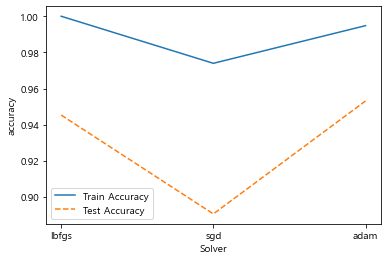

In [54]:
#solver별 정확도 그래프로 확인
plt.plot(para_solver, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Solver')
plt.legend()

## 'adam' solver을 적용 했을 때, 데이터의 정확도가 가장 차이가 적어 일반화가 잘되며,
## 'sgd' solver의 경우, train데이터로 과대적합 되므로, 좋은 모델이 아니다.
## 'ibfgs'의 solver의 경우, 'adam'보다 조금 더 train 데이터의 정확도가 높지만, 
## 과적합의 경향성이 보이고, test 와의 차이도 크므로, 'adam'으로 solver을 선정한다.
## solver = 'adam'

In [71]:
#Mini Batch 변경
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# mini batch 변경
para_batch = [40*batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = 'adam', activation = 'relu', hidden_layer_sizes = (60, 60), random_state = 1234)
    nn.fit(df_scaled_train_x, train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, test_y))
    
#데이터 테이블로 저장 및 확인
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch['Mini Batsh'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy
df_accuracy_batch.round(3)

C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

,Mini Batsh,TrainAccuracy,TestAccuracy
0,40,1.000,0.953
1,80,1.000,0.953
2,120,1.000,0.953
3,160,1.000,0.953
4,200,0.995,0.953
5,240,0.995,0.953
6,280,0.995,0.953
7,320,0.995,0.953
8,360,0.995,0.953


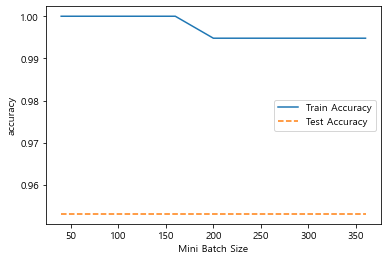

In [72]:
#mini batch별 정확도 그래프로 확인
plt.plot(para_batch, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_batch, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Mini Batch Size')
plt.legend()

## mini batch는 그 크기가 증가 할 수록, 오차가 증가할 경향성이 있다.
## 따라서, 최대한 para_batch를 선정할 때, 경우에 따라 batch의 곱을 적게 하는 것이 좋으나,
## 10이나 20으로 설정하면, 결과값이 보이지 않으므로, 40으로 설정 후, 200으로 선정하였다.
## 또한, train 데이터는 과적합 경향이 보인다.
## batch_size = 200

In [128]:
#결론 도출
#최종 모델 선택

nn_final = MLPClassifier(batch_size = 200, solver = 'adam', activation = 'relu', hidden_layer_sizes = (60, 60), random_state = 1234)
nn_final.fit(df_scaled_train_x, train_y)

#평가
y_pred = nn_final.predict(df_scaled_test_x)

print("Accuracy on training set: {:3f}".format(nn_final.score(df_scaled_train_x, train_y))) #train 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_final.score(df_scaled_test_x, test_y))) #test 데이터 셋 정확도

C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:353: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Accuracy on training set: 0.994792
Accuracy on test set: 0.953


C:\Users\ymh20\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [129]:
print("Confusion matrix: \n{}".format(confusion_matrix(test_y, y_pred)))

Confusion matrix: 
[[31  0]
 [ 6 91]]


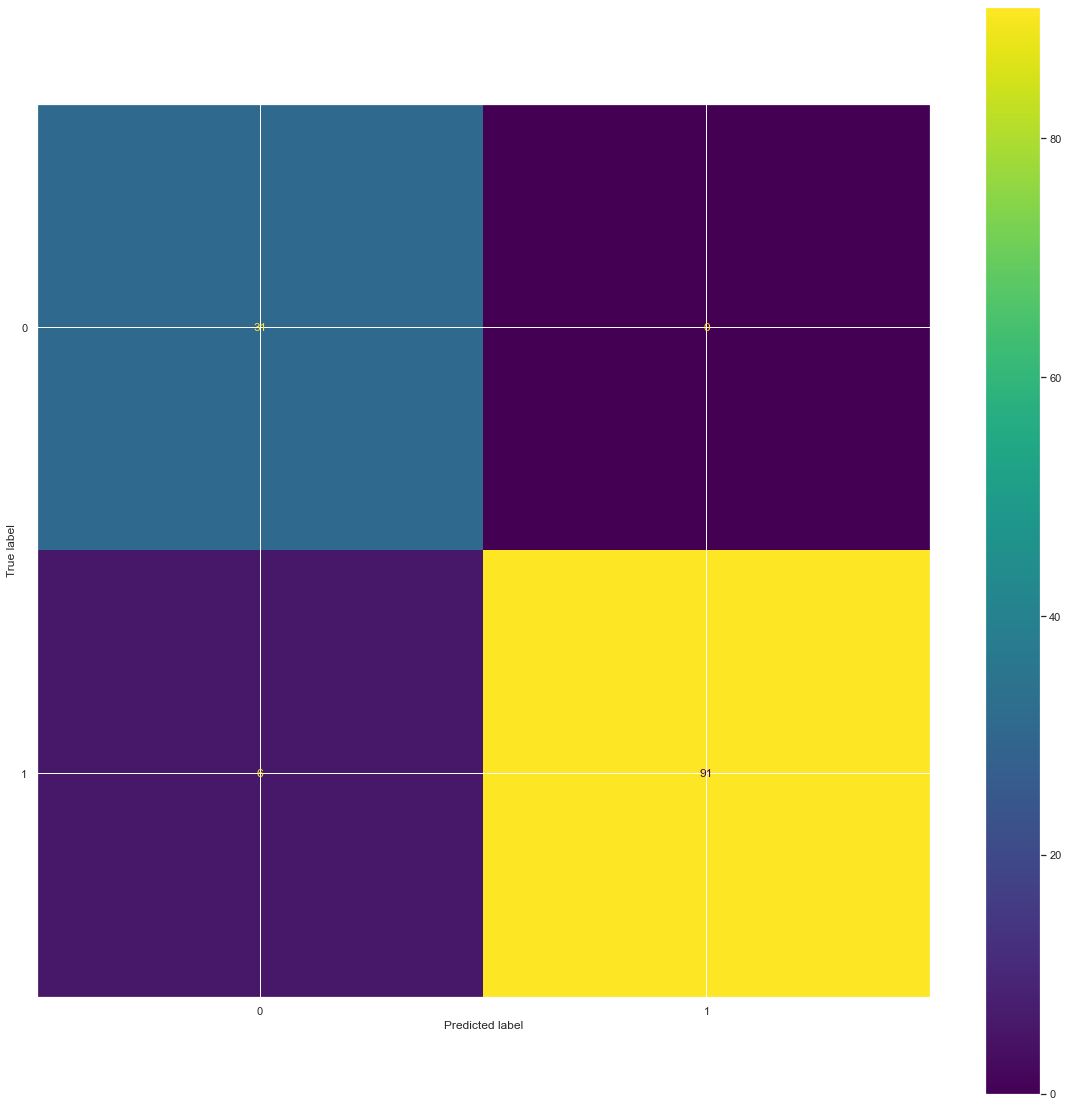

In [130]:
sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(test_y, y_pred)).plot()

## 결과적으로, 최종 모델의 train 데이터 정확도는 99.4% test 데이터의 정확도는 95.3%이다.
## 이는, 처음 scaled 인공신경망 모델의 train 정확도 99.5%, test 정확도 95.3% 과 비교할 때,
## 거의 같은 정확도이므로, parameter를 선정하여, 더 좋은 모델을 만드는 것에는 실패했다.
## 이는, 자료의 수가 적은 데이터이기 때문에, 좋은 모델을 선정하기 어려움이 있었다.
## 또한, Confusion matrix를 통해, 정분류율은 95.3%, 오분류율은 4.7%임을 알 수 있다.

# 
# KNN 예제

In [75]:
#패키지 불러오기
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# data 불러오기
data = pd.read_csv("유방암.csv", engine = 'python', encoding='cp949')
data.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [77]:
# 결측치 확인, 결측치 없음 > 결측치 처리 X

data.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [78]:
# x와 y 목표변수 기준으로 분리
data_y = data[['diagnosis']]
data_x = data.drop('diagnosis', axis=1)

# 더미변수 생성
data_x = pd.get_dummies(data_x)
data_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [79]:
# 데이터 분할 후 train, test 데이터로 저장

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(data_x, data_y, test_size = 0.4, random_state = 1234)
print(df_train_x.shape)
print(df_test_x.shape)
print(df_train_y.shape)
print(df_test_y.shape)

(192, 30)
(128, 30)
(192, 1)
(128, 1)


In [80]:
# KNN 모델 생성(default 설정)
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print('Accuracy on training set: {:.3f}'.format(knn_uncusotomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set: {:.3f}'.format(knn_uncusotomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.932
Accuracy on test set: 0.914


<ipython-input-80-1d9348f9fb21>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_uncusotomized.fit(df_train_x, df_train_y)


## KNN 모델의 정확도는 train 93.2%, test 91.4%로 
## 둘의 차이가 크지 않아, 일반화는 잘된 모델임을 알 수 있다. 그러나, 정확도는 높지 않다.

In [109]:
# 이웃 수 증가에 따른 정확도 변화 (모델 생성)
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 최대 이웃 수 : 1 ~ 15
para_n_neighbors = [i for i in range(3,31)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy
df_accuracy_neighbors.round(3)

<ipython-input-109-a4cc028427f3>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-109-a4cc028427f3>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-109-a4cc028427f3>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-109-a4cc028427f3>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-109-a4cc028427f3>:9: DataConversionWarning: A column-vector y was passed when a 1

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.932,0.898
1,4,0.932,0.906
2,5,0.932,0.914
3,6,0.927,0.930
4,7,0.927,0.898
5,8,0.906,0.883
6,9,0.911,0.906
7,10,0.906,0.938
8,11,0.917,0.906
9,12,0.906,0.906


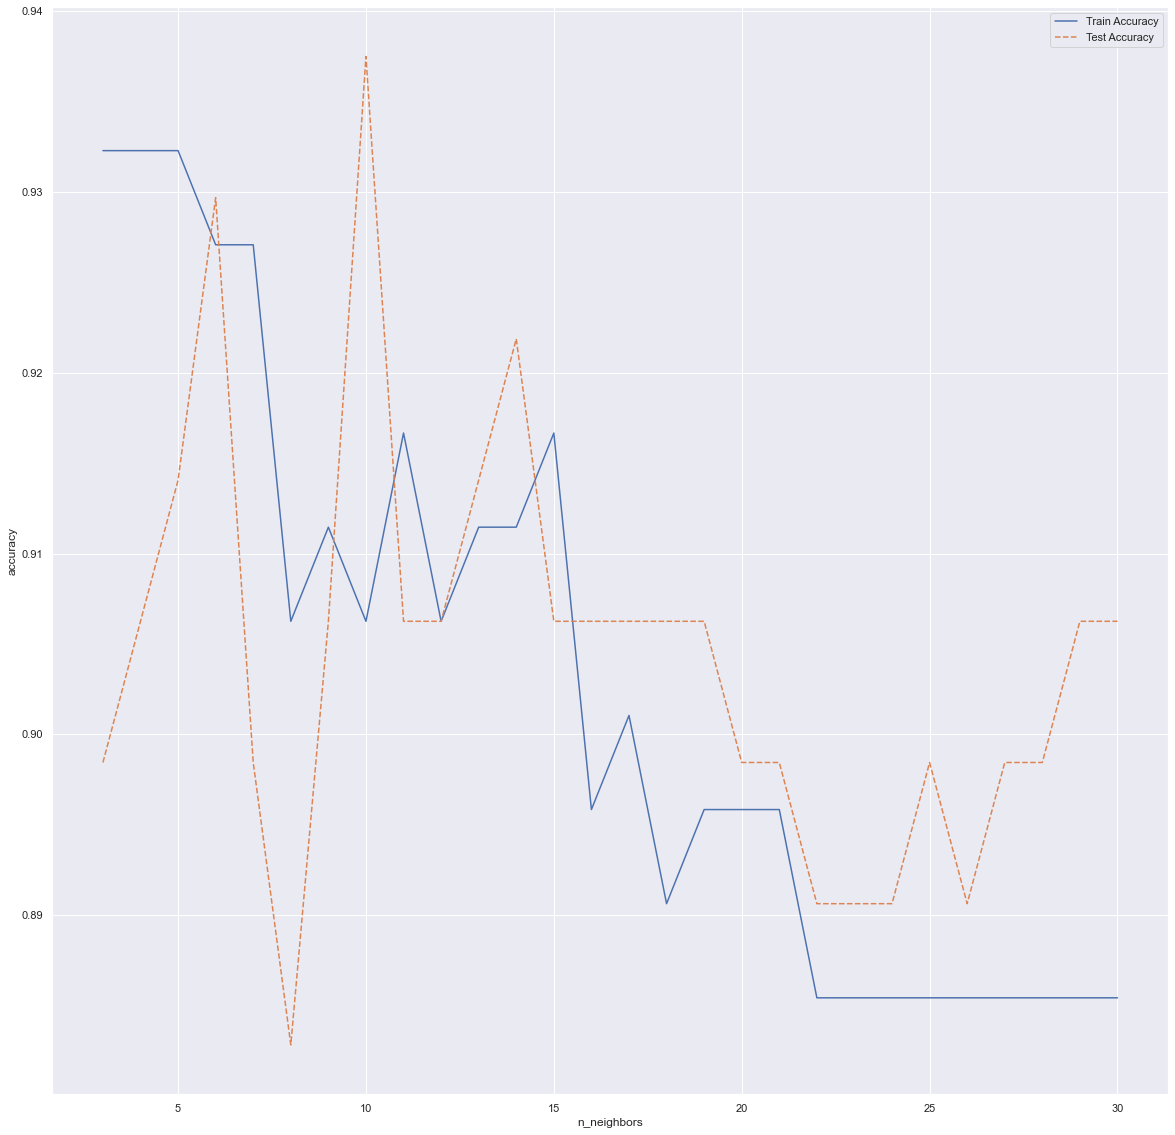

In [110]:
#데이터의 정확도를 그래프로 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

## 군집이 1개 일 때, Train 데이터의 정확도는 군집이 5~10개가 되면서, 
## train 데이터의 정확도는 급감한다. test 데이터의 정확도는 군집이 5개까지 증가하고,
## 이후, 증감을 반복한다.
## 최근접 이웃(이웃 수)이 작으면 과대적합의 위험이 증가, 크면 과소적합될 위험이 증가한다.
## 최근접 이웃 수를 6으로 그 값을 선정한다.

In [121]:
n_neighbors=6

In [112]:
# 가중치별 이웃 수 증가에 따른 정확도 변화 (모델 생성)
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수 
para_n_neighbors = [i for i in range(1,11)] * 2

# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"]*10)

# zip( list1, list2, ···)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy
df_accuracy_weights.round(3)

<ipython-input-112-3b7498e24548>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-112-3b7498e24548>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-112-3b7498e24548>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-112-3b7498e24548>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-112-3b7498e24548>:16: DataConversionWarning: A column-vector y was passed whe

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.898
1,2,uniform,0.922,0.875
2,3,uniform,0.932,0.898
3,4,uniform,0.932,0.906
4,5,uniform,0.932,0.914
5,6,uniform,0.927,0.930
6,7,uniform,0.927,0.898
7,8,uniform,0.906,0.883
8,9,uniform,0.911,0.906
9,10,uniform,0.906,0.938


In [113]:
# 그림을 그리기 위해 데이터의 형태를 반환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights", \
                                                     values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.898438  0.898438
2                   1.0  0.921875     0.898438  0.875000
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.932292     0.898438  0.906250
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.929688
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.906250     0.906250  0.882812
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.906250     0.929688  0.937500

In [114]:
# pivot을 이용할 경우, columns와 values가 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.898438,0.898438
2,1.0,0.921875,0.898438,0.875000
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.932292,0.898438,0.906250
5,1.0,0.932292,0.914062,0.914062


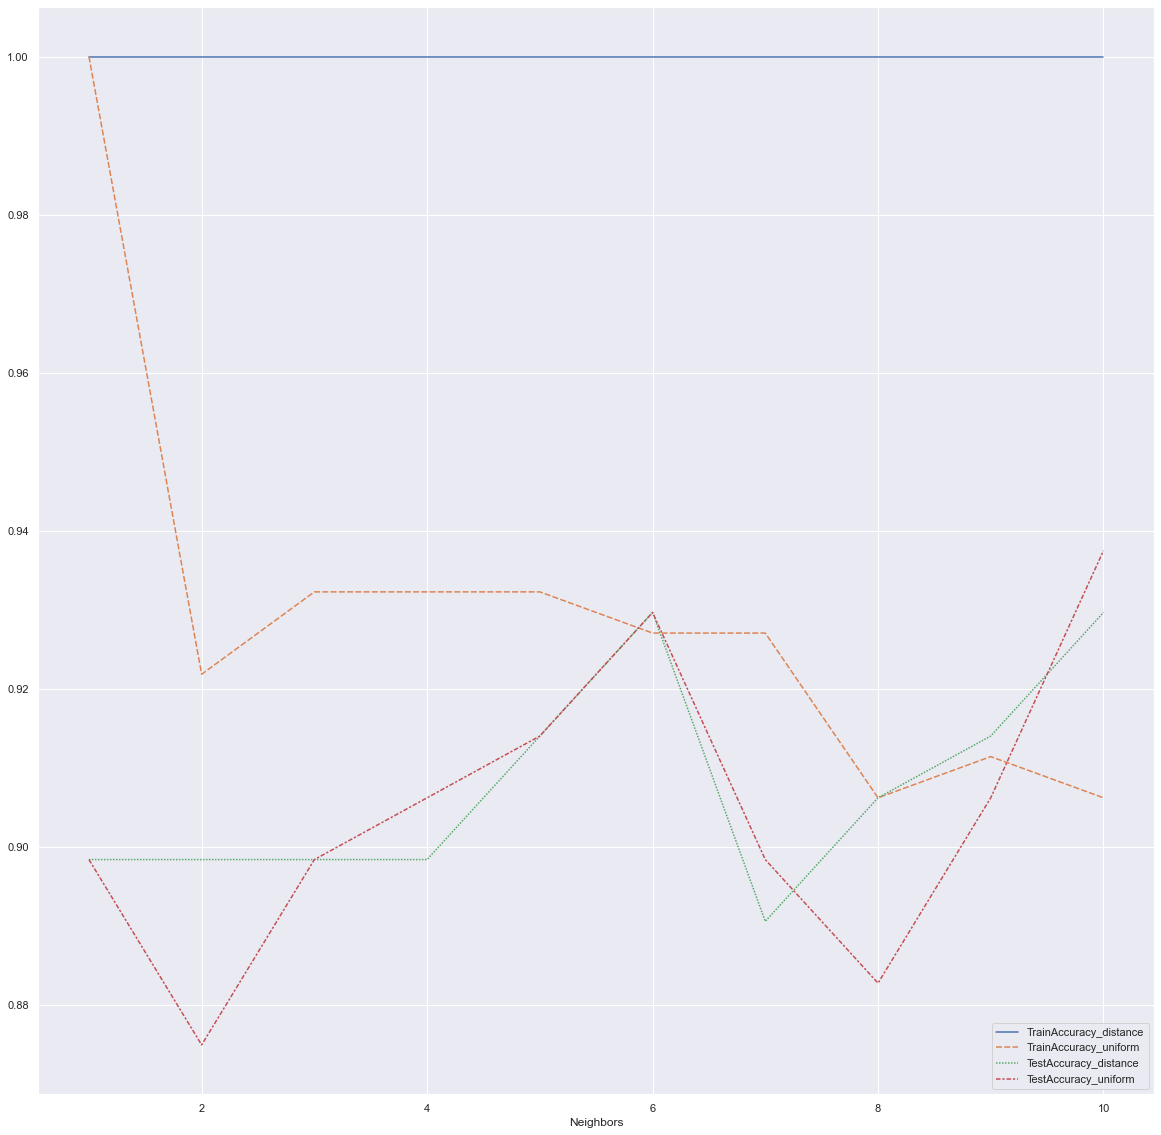

In [115]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)
sns.set(rc={'figure.figsize': (20,20)}) #그래프가 설명에 가려 제대로 확인 불가능하므로, 그래프의 사이즈 변경


## 가중치별 이웃 수가 distance 일 때, train 데이터의 모델이 과대적합 경향성이 보이고,
## test 데이터와 많은 차이로, 일반화도 어려운 모델이므로, 
## weights='uniform'으로 선정한다.

In [116]:
# 임의로 지정
weights = 'uniform'

In [117]:
#거리 계싼 방법별 이웃 수 증가에 따른 정확도 변화
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수 
para_n_neighbors = [i for i in range(1,11)] * 3
# 거리 계산 방법 (minkowski, euclidean, manhattan)
para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy
df_accuracy_metric.round(3)

<ipython-input-117-f735ea9e19a2>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-117-f735ea9e19a2>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-117-f735ea9e19a2>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-117-f735ea9e19a2>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(df_train_x, df_train_y)
<ipython-input-117-f735ea9e19a2>:11: DataConversionWarning: A column-vector y was passed whe

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.898
1,2,minkowski,0.922,0.875
2,3,minkowski,0.932,0.898
3,4,minkowski,0.932,0.906
4,5,minkowski,0.932,0.914
5,6,minkowski,0.927,0.930
6,7,minkowski,0.927,0.898
7,8,minkowski,0.906,0.883
8,9,minkowski,0.911,0.906
9,10,minkowski,0.906,0.938


<AxesSubplot:xlabel='Neighbors'>

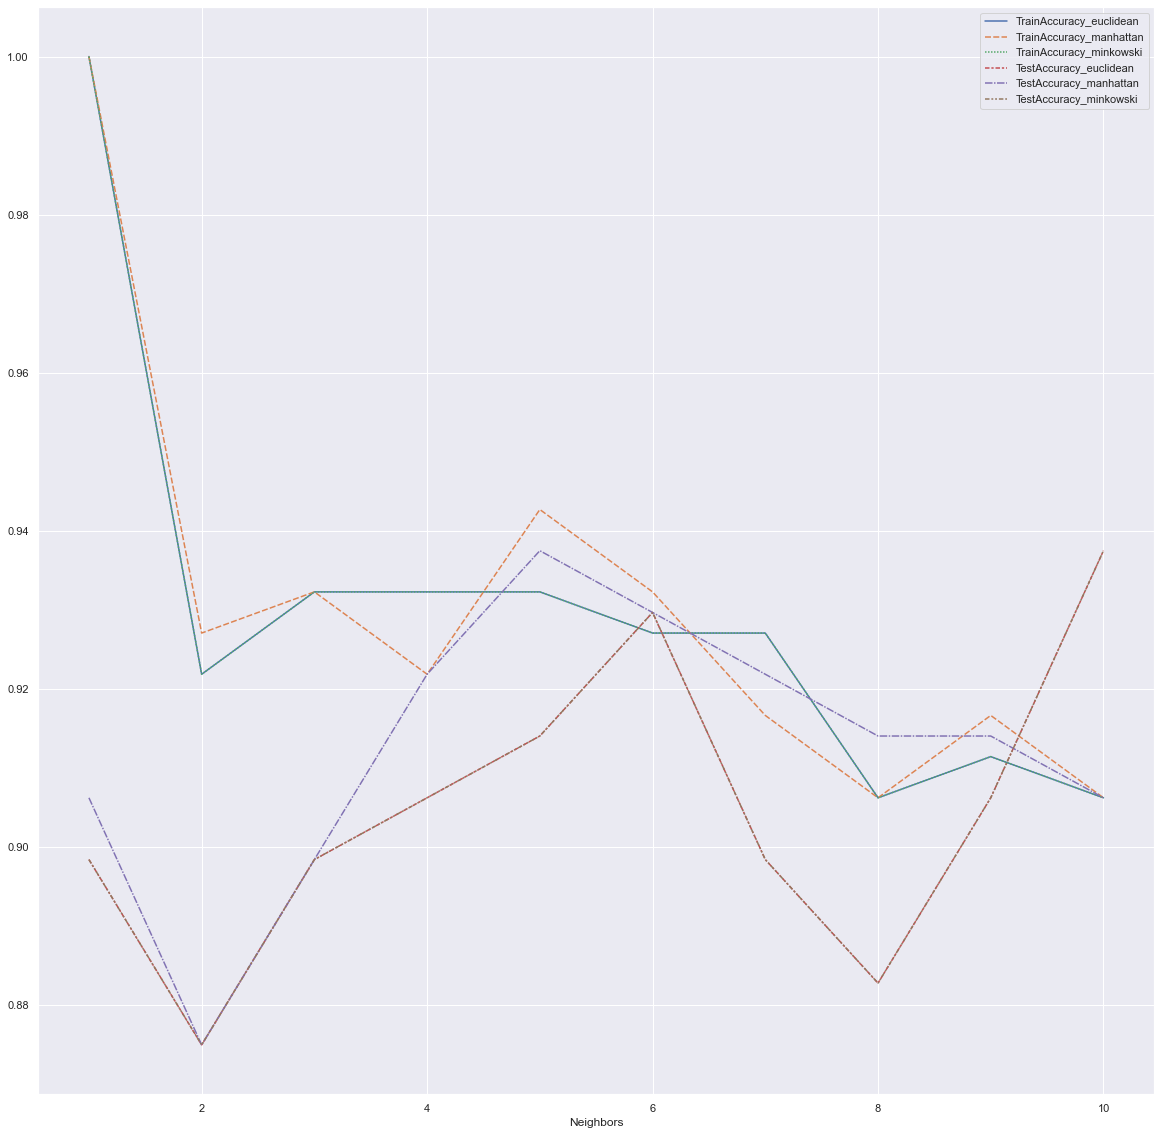

In [118]:
# 정확도를 그래프로 그림
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors', columns = 'Metric', \
                                                   values = ["TrainAccuracy", "TestAccuracy"])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

## 왜인지 모르게 선이 4개밖에 안보여서..! minkowski 확인 불가
## 보이는 선들로만 일단 분석했습니다..!
## 초록선과 노란선은 train 데이터로 비슷한 성향을 보이고,
## 빨간선과 보라선은 test 데이터로 비슷한 성향을 보이나,
## 초록선과 빨간선의 간격의 차이보다, 노란선과 보라선의 간격의 차이가 더 좁으므로,
## 정확도의 경향을 고려하여, manhattan 선정

In [120]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform', metric = 'manhattan')
knn_model.fit(df_train_x, df_train_y)

# 평가
y_pred = knn_model.predict(df_test_x)
# train 데이터 셋 정확도
print('train data accuracy: {0:.3f}'.format(knn_model.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print('test data accuracy: {0:.3f}\n'.format(knn_model.score(df_test_x, df_test_y)))
# confusion matrix
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

train data accuracy: 0.932
test data accuracy: 0.930

Confusion matrix: 
[[30  1]
 [ 8 89]]


<ipython-input-120-8518c3d5763b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(df_train_x, df_train_y)


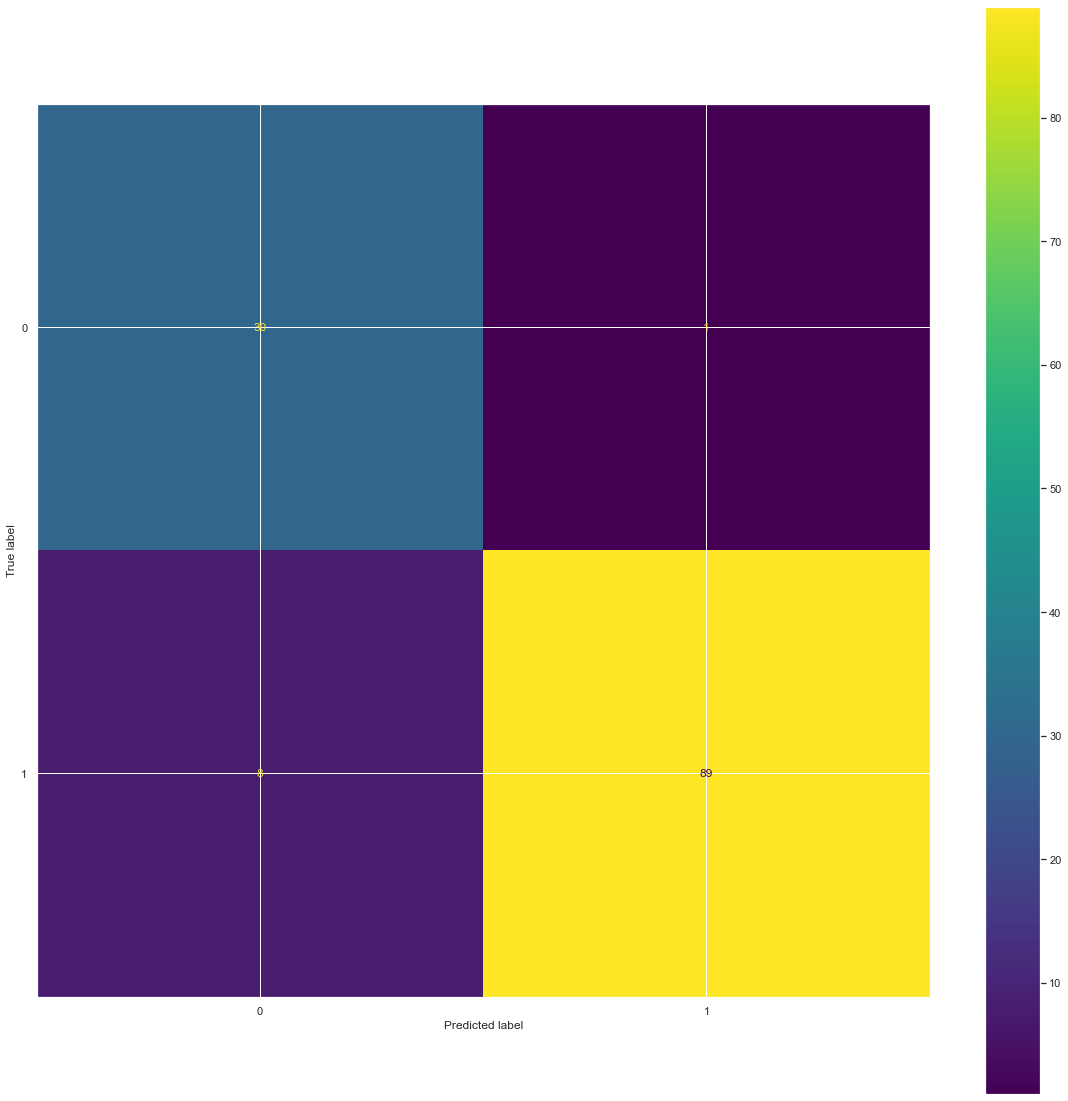

In [124]:
import sklearn.metrics

sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(df_test_y, y_pred)).plot()

## 결과적으로, 최종 모델의 train 데이터 정확도는 93.2% test 데이터의 정확도는 93.0%이다.
## 이는, 처음 KNN모델의 train 정확도 93.2%, test 정확도 91.4% 와 비교할 때,
## train은 거의 같은 정확도이나, parameter를 선정하여, test 데이터의 정확도가 더 올라가
## 어느 한 쪽으로의 과대적합 경향성을 없애고, 일반화에 좋은 모델을 선정하였으므로
## 비교적 더 좋은 모델을 선정했음을 알 수 있다. 
## 그러나, 정확도가 높지 않아, 좀 더 parameter를 신중히 조절해야 할 것이다.
## 이는, 자료의 수가 적은 데이터이기 때문에, 좋은 모델을 선정하기 어려움이 있었다.
## 또한, Confusion matrix를 통해, 정분류율은 92.9%, 오분류율은 7.1%임을 알 수 있다.